# ノック11 : データ読み込み
- Data set in this chapter contain .xlsx format
- Be carefull to read this by pandas

In [1]:
import pandas as pd
uriage_data = pd.read_csv('uriage.csv')
uriage_data.head()

# uriage_data has missing data

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商 品 S,NaN,浅田賢二
2,2019-05-11 19:42:07,商 品 a,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二


In [2]:
kokyaku_data = pd.read_excel('kokyaku_daicho.xlsx')
kokyaku_data.head()

# There are different format data in '登録日'

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田 敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀 希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07
3,荻野 愛,おぎの あい,F市,ogino_ai@example.com,42872
4,栗田 憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127


# ノック12 : 表記の揺れを確認する

In [3]:
uriage_data['item_name'].head()

# data in this variable : 
## with white space vs without white space
## with upper case vs with lower case
# variation with combination above.

0      商品A
1    商 品 S
2    商 品 a
3      商品Z
4      商品a
Name: item_name, dtype: object

In [4]:
uriage_data['item_price'].head

# this variable has missing data

<bound method NDFrame.head of 0        100.0
1          NaN
2          NaN
3       2600.0
4          NaN
         ...  
2994    2500.0
2995    1300.0
2996       NaN
2997       NaN
2998     400.0
Name: item_price, Length: 2999, dtype: float64>

# ノック13 : 表記の揺れがあるまま集計してみる

In [5]:
uriage_data['purchase_date'] = pd.to_datetime(uriage_data['purchase_date'])
uriage_data['purchase_month'] = uriage_data['purchase_date'].dt.strftime('%Y%m')
res = uriage_data.pivot_table(index = 'purchase_month',
                              columns = 'item_name',
                              aggfunc = 'size',
                              fill_value = 0)
res

# the result has 99 columns, it is too many!

item_name,商品W,商 品 n,商品E,商品M,商品P,商品S,商品W,商品X,商 品O,商 品Q,...,商品k,商品l,商品o,商品p,商品r,商品s,商品t,商品v,商品x,商品y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
201903,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
201905,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
201906,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
201907,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


In [6]:
res = uriage_data.pivot_table(index = 'purchase_month',
                              columns = 'item_name',
                              values = 'item_price',
                              aggfunc = 'sum',
                              fill_value = 0)
res

item_name,商品W,商 品 n,商品E,商品M,商品P,商品S,商品W,商品X,商 品O,商 品Q,...,商品k,商品l,商品o,商品p,商品r,商品s,商品t,商品v,商品x,商品y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,0,1400,0,0,0,0,0,0,0,0,...,1100,1200,1500,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,0,2400,0,0,...,0,0,0,0,0,1900,2000,2200,0,0
201903,0,0,500,1300,1600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,2300,0,0,0,0,0,0,0,0,1700,...,0,0,0,0,0,1900,0,0,0,0
201905,0,0,0,0,0,1900,0,0,0,0,...,0,1200,0,0,0,0,0,0,0,2500
201906,0,0,0,0,0,0,2300,0,0,0,...,0,0,0,1600,0,0,0,0,2400,0
201907,0,0,0,0,0,0,0,0,0,0,...,0,0,1500,0,1800,0,0,0,0,0


# ノック14 : 表記の揺れを補正

In [7]:
print(len(pd.unique(uriage_data['item_name'])))

# 99 unique data in item_name before correcting

99


In [8]:
uriage_data['item_name'] = uriage_data['item_name'].str.upper()            # convert lower case to upper case
uriage_data['item_name'] = uriage_data['item_name'].str.replace('　', '')  # delete 2byte white space
uriage_data['item_name'] = uriage_data['item_name'].str.replace(' ', '')   # delete 1byte white space
uriage_data.sort_values(by=['item_name'], ascending = True)                # sort by item_name 

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,201906
1748,2019-05-19 20:22:22,商品A,100.0,松川綾女,201905
223,2019-06-25 08:13:20,商品A,100.0,板橋隆,201906
1742,2019-06-13 16:03:17,商品A,100.0,小平陽子,201906
1738,2019-02-10 00:28:43,商品A,100.0,松田浩正,201902
...,...,...,...,...,...
2880,2019-04-22 00:36:52,商品Y,NaN,田辺光洋,201904
2881,2019-04-30 14:21:09,商品Y,NaN,高原充則,201904
1525,2019-01-24 10:27:23,商品Y,2500.0,五十嵐春樹,201901
1361,2019-05-28 13:45:32,商品Y,2500.0,大崎ヒカル,201905


In [9]:
print(pd.unique(uriage_data['item_name']))
print(len(pd.unique(uriage_data['item_name'])))

# 26 unique data after correcting

['商品A' '商品S' '商品Z' '商品V' '商品O' '商品U' '商品L' '商品C' '商品I' '商品R' '商品X' '商品G'
 '商品P' '商品Q' '商品Y' '商品N' '商品W' '商品E' '商品K' '商品B' '商品F' '商品D' '商品M' '商品H'
 '商品T' '商品J']
26


In [10]:
uriage_data.isnull().any(axis=0)

# missing data is only in item_price

purchase_date     False
item_name         False
item_price         True
customer_name     False
purchase_month    False
dtype: bool

In [33]:
# refactor the code above using merge
item_price = uriage_data[['item_name', 'item_price']].dropna().drop_duplicates().sort_values(by='item_name').reset_index(drop = True)
uriage_data_merge = pd.merge(uriage_data[['purchase_date','item_name','customer_name','purchase_month']], item_price, on='item_name', right_index=True)

In [65]:
uriage_data_merge.head()

,purchase_date,item_name,customer_name,purchase_month,item_price
0,2019-06-13 18:02:34,商品A,深井菜々美,201906,100.0
2,2019-05-11 19:42:07,商品A,南部慶二,201905,100.0
4,2019-04-22 03:09:35,商品A,平田鉄二,201904,100.0
6,2019-05-18 19:16:53,商品A,深井照生,201905,100.0
9,2019-01-28 10:47:03,商品A,大地礼子,201901,100.0


In [63]:
uriage_data_merge.isnull().any(axis=0)

purchase_date     False
item_name         False
customer_name     False
purchase_month    False
item_price        False
dtype: bool

In [64]:
flg_is_null = uriage_data['item_price'].isnull()
for trg in list(uriage_data.loc[flg_is_null, 'item_name'].unique()):
    price = uriage_data.loc[(~flg_is_null) & (uriage_data['item_name'] == trg), 'item_price'].max()
    uriage_data['item_price'].loc[(flg_is_null) & (uriage_data['item_name'] == trg)] = price

uriage_data.head()

# the item with same name has same price
# this code is a little bit complex and not easy to understand

C:\Users\YusukeSato\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,201906
1,2019-07-13 13:05:29,商品S,1900.0,浅田賢二,201907
2,2019-05-11 19:42:07,商品A,100.0,南部慶二,201905
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒,201902
4,2019-04-22 03:09:35,商品A,100.0,平田鉄二,201904


In [73]:
for trg in list(uriage_data['item_name'].sort_values().unique()):
    print(trg + 'の最大額:' + str(uriage_data.loc[uriage_data['item_name']==trg]['item_price'].max()) + 'の最小額:' + str(uriage_data.loc[uriage_data['item_name']==trg]['item_price'].min(skipna=False)))

商品Aの最大額:100.0の最小額:100.0
商品Bの最大額:200.0の最小額:200.0
商品Cの最大額:300.0の最小額:300.0
商品Dの最大額:400.0の最小額:400.0
商品Eの最大額:500.0の最小額:500.0
商品Fの最大額:600.0の最小額:600.0
商品Gの最大額:700.0の最小額:700.0
商品Hの最大額:800.0の最小額:800.0
商品Iの最大額:900.0の最小額:900.0
商品Jの最大額:1000.0の最小額:1000.0
商品Kの最大額:1100.0の最小額:1100.0
商品Lの最大額:1200.0の最小額:1200.0
商品Mの最大額:1300.0の最小額:1300.0
商品Nの最大額:1400.0の最小額:1400.0
商品Oの最大額:1500.0の最小額:1500.0
商品Pの最大額:1600.0の最小額:1600.0
商品Qの最大額:1700.0の最小額:1700.0
商品Rの最大額:1800.0の最小額:1800.0
商品Sの最大額:1900.0の最小額:1900.0
商品Tの最大額:2000.0の最小額:2000.0
商品Uの最大額:2100.0の最小額:2100.0
商品Vの最大額:2200.0の最小額:2200.0
商品Wの最大額:2300.0の最小額:2300.0
商品Xの最大額:2400.0の最小額:2400.0
商品Yの最大額:2500.0の最小額:2500.0
商品Zの最大額:2600.0の最小額:2600.0


In [78]:
# refactor and rewrite to simple and easy to read
trgs = list(uriage_data['item_name'].sort_values().unique())
for trg in trgs:
    max = uriage_data.loc[uriage_data['item_name'] == trg]['item_price'].max()
    min = uriage_data.loc[uriage_data['item_name'] == trg]['item_price'].min(skipna = True)
    print('{}の最大額:{}, 最少額:{}'.format(trg, str(max), str(min)))

商品Aの最大額:100.0, 最少額:100.0
商品Bの最大額:200.0, 最少額:200.0
商品Cの最大額:300.0, 最少額:300.0
商品Dの最大額:400.0, 最少額:400.0
商品Eの最大額:500.0, 最少額:500.0
商品Fの最大額:600.0, 最少額:600.0
商品Gの最大額:700.0, 最少額:700.0
商品Hの最大額:800.0, 最少額:800.0
商品Iの最大額:900.0, 最少額:900.0
商品Jの最大額:1000.0, 最少額:1000.0
商品Kの最大額:1100.0, 最少額:1100.0
商品Lの最大額:1200.0, 最少額:1200.0
商品Mの最大額:1300.0, 最少額:1300.0
商品Nの最大額:1400.0, 最少額:1400.0
商品Oの最大額:1500.0, 最少額:1500.0
商品Pの最大額:1600.0, 最少額:1600.0
商品Qの最大額:1700.0, 最少額:1700.0
商品Rの最大額:1800.0, 最少額:1800.0
商品Sの最大額:1900.0, 最少額:1900.0
商品Tの最大額:2000.0, 最少額:2000.0
商品Uの最大額:2100.0, 最少額:2100.0
商品Vの最大額:2200.0, 最少額:2200.0
商品Wの最大額:2300.0, 最少額:2300.0
商品Xの最大額:2400.0, 最少額:2400.0
商品Yの最大額:2500.0, 最少額:2500.0
商品Zの最大額:2600.0, 最少額:2600.0


# ノック16:名前の表記ゆれ補正

In [79]:
kokyaku_data['顧客名'].head()

# customer names in kokyaku_data have some variation
## family name and first name are devided by 1byte white space
## family name and first name are devided by 2byte white space
## family name and first name are not devided

0     須賀ひとみ
1    岡田　 敏也
2      芳賀 希
3     荻野  愛
4     栗田 憲一
Name: 顧客名, dtype: object

In [82]:
uriage_data['customer_name'].head()

# customer names are not devided into familiname and first name

0    深井菜々美
1     浅田賢二
2     南部慶二
3     麻生莉緒
4     平田鉄二
Name: customer_name, dtype: object

In [84]:
kokyaku_data['顧客名'] = kokyaku_data['顧客名'].str.replace('　', '')
kokyaku_data['顧客名'] = kokyaku_data['顧客名'].str.replace(' ', '')
kokyaku_data['顧客名'].head()

0    須賀ひとみ
1     岡田敏也
2      芳賀希
3      荻野愛
4     栗田憲一
Name: 顧客名, dtype: object

# ノック17:日付の揺れを補正

In [87]:
flg_is_serial = kokyaku_data['登録日'].astype('str').str.isdigit()
flg_is_serial.sum()

22

In [89]:
fromSerial = pd.to_timedelta(kokyaku_data.loc[flg_is_serial, '登録日'].astype('float'), unit = 'D') + pd.to_datetime('1900/01/01')
fromSerial

1     2017-02-18
3     2017-05-19
4     2018-01-29
21    2017-07-06
27    2017-06-17
47    2017-01-08
49    2017-07-15
53    2017-04-10
76    2018-03-31
80    2018-01-12
99    2017-06-01
114   2018-06-05
118   2018-01-31
122   2018-04-18
139   2017-05-27
143   2017-03-26
155   2017-01-21
172   2018-03-24
179   2017-01-10
183   2017-07-26
186   2018-07-15
192   2018-06-10
Name: 登録日, dtype: datetime64[ns]

In [90]:
fromString = pd.to_datetime(kokyaku_data.loc[~flg_is_serial, '登録日'])
fromString

0     2018-01-04
2     2018-01-07
5     2017-06-20
6     2018-06-11
7     2017-05-19
         ...    
195   2017-06-20
196   2018-06-20
197   2017-04-29
198   2019-04-19
199   2019-04-23
Name: 登録日, Length: 178, dtype: datetime64[ns]

In [91]:
kokyaku_data['登録日'] = pd.concat([fromSerial, fromString])
kokyaku_data

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04
1,岡田敏也,おかだ としや,E市,okada_toshiya@example.com,2017-02-18
2,芳賀希,はが のぞみ,A市,haga_nozomi@example.com,2018-01-07
3,荻野愛,おぎの あい,F市,ogino_ai@example.com,2017-05-19
4,栗田憲一,くりた けんいち,E市,kurita_kenichi@example.com,2018-01-29
...,...,...,...,...,...
195,川上りえ,かわかみ りえ,G市,kawakami_rie@example.com,2017-06-20
196,小松季衣,こまつ としえ,E市,komatsu_toshie@example.com,2018-06-20
197,白鳥りえ,しらとり りえ,F市,shiratori_rie@example.com,2017-04-29
198,大西隆之介,おおにし りゅうのすけ,H市,oonishi_ryuunosuke@example.com,2019-04-19


In [94]:
kokyaku_data['登録年月'] = kokyaku_data['登録日'].dt.strftime('%Y%m')
rslt = kokyaku_data.groupby('登録年月').count()['顧客名']
print(rslt)
print(len(kokyaku_data))

登録年月
201701    15
201702    11
201703    14
201704    15
201705    13
201706    14
201707    17
201801    13
201802    15
201803    17
201804     5
201805    19
201806    13
201807    17
201904     2
Name: 顧客名, dtype: int64
200


In [96]:
flg_is_serial = kokyaku_data['登録日'].astype('str').str.isdigit()
flg_is_serial.sum()

0

# ノック18:顧客名をキーにジョイン

In [99]:
join_data = pd.merge(uriage_data, kokyaku_data, left_on='customer_name', right_on='顧客名', how='left')
join_data = join_data.drop('customer_name', axis=1)
join_data

,purchase_date,item_name,item_price,purchase_month,顧客名,かな,地域,メールアドレス,登録日,登録年月
0,2019-06-13 18:02:34,商品A,100.0,201906,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26,201701
1,2019-07-13 13:05:29,商品S,1900.0,201907,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07,201804
2,2019-05-11 19:42:07,商品A,100.0,201905,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19,201806
3,2019-02-12 23:40:45,商品Z,2600.0,201902,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22,201807
4,2019-04-22 03:09:35,商品A,100.0,201904,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07,201706
...,...,...,...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:39,商品Y,2500.0,201902,福島友也,ふくしま ともや,B市,fukushima_tomoya@example.com,2017-07-01,201707
2995,2019-06-22 04:03:43,商品M,1300.0,201906,大倉晃司,おおくら こうじ,E市,ookura_kouji@example.com,2018-03-31,201803
2996,2019-03-29 11:14:05,商品Q,1700.0,201903,尾形小雁,おがた こがん,B市,ogata_kogan@example.com,2017-03-15,201703
2997,2019-07-14 12:56:49,商品H,800.0,201907,芦田博之,あしだ ひろゆき,E市,ashida_hiroyuki@example.com,2018-07-15,201807


# ノック19:ダンプ（=書き出し）

In [100]:
dump_data = join_data[['purchase_date', 'purchase_month', 'item_name', 'item_price', '顧客名', 'かな', '地域', 'メールアドレス', '登録日']]
dump_data

,purchase_date,purchase_month,item_name,item_price,顧客名,かな,地域,メールアドレス,登録日
0,2019-06-13 18:02:34,201906,商品A,100.0,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26
1,2019-07-13 13:05:29,201907,商品S,1900.0,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07
2,2019-05-11 19:42:07,201905,商品A,100.0,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19
3,2019-02-12 23:40:45,201902,商品Z,2600.0,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22
4,2019-04-22 03:09:35,201904,商品A,100.0,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07
...,...,...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:39,201902,商品Y,2500.0,福島友也,ふくしま ともや,B市,fukushima_tomoya@example.com,2017-07-01
2995,2019-06-22 04:03:43,201906,商品M,1300.0,大倉晃司,おおくら こうじ,E市,ookura_kouji@example.com,2018-03-31
2996,2019-03-29 11:14:05,201903,商品Q,1700.0,尾形小雁,おがた こがん,B市,ogata_kogan@example.com,2017-03-15
2997,2019-07-14 12:56:49,201907,商品H,800.0,芦田博之,あしだ ひろゆき,E市,ashida_hiroyuki@example.com,2018-07-15


In [102]:
dump_data.to_csv('dump_data.csv', index=False)

# ノック20:集計

In [103]:
import_data = pd.read_csv('dump_data.csv')
import_data

,purchase_date,purchase_month,item_name,item_price,顧客名,かな,地域,メールアドレス,登録日
0,2019-06-13 18:02:34,201906,商品A,100.0,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26 00:00:00
1,2019-07-13 13:05:29,201907,商品S,1900.0,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07 00:00:00
2,2019-05-11 19:42:07,201905,商品A,100.0,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19 00:00:00
3,2019-02-12 23:40:45,201902,商品Z,2600.0,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22 00:00:00
4,2019-04-22 03:09:35,201904,商品A,100.0,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07 00:00:00
...,...,...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:39,201902,商品Y,2500.0,福島友也,ふくしま ともや,B市,fukushima_tomoya@example.com,2017-07-01 00:00:00
2995,2019-06-22 04:03:43,201906,商品M,1300.0,大倉晃司,おおくら こうじ,E市,ookura_kouji@example.com,2018-03-31 00:00:00
2996,2019-03-29 11:14:05,201903,商品Q,1700.0,尾形小雁,おがた こがん,B市,ogata_kogan@example.com,2017-03-15 00:00:00
2997,2019-07-14 12:56:49,201907,商品H,800.0,芦田博之,あしだ ひろゆき,E市,ashida_hiroyuki@example.com,2018-07-15 00:00:00


In [104]:
byItem = import_data.pivot_table(index = 'purchase_month',
                                 columns = 'item_name',
                                 aggfunc = 'size',
                                 fill_value = 0)
byItem

item_name,商品A,商品B,商品C,商品D,商品E,商品F,商品G,商品H,商品I,商品J,...,商品Q,商品R,商品S,商品T,商品U,商品V,商品W,商品X,商品Y,商品Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,18,13,19,17,18,15,11,16,18,17,...,17,21,20,17,7,22,13,14,10,0
201902,19,14,26,21,16,14,14,17,12,14,...,22,22,22,23,19,22,24,16,11,1
201903,17,21,20,17,9,27,14,18,12,16,...,23,16,20,12,23,18,16,21,16,0
201904,17,19,24,20,18,17,14,11,18,13,...,20,20,16,16,11,15,14,16,20,0
201905,24,14,16,14,19,18,23,15,16,11,...,13,22,18,16,16,9,21,16,20,0
201906,24,12,11,19,13,18,15,13,19,22,...,15,16,21,12,18,20,17,15,13,0
201907,20,20,17,17,12,17,19,19,19,23,...,15,19,23,21,13,28,16,18,12,0


In [112]:
byPrice = import_data.pivot_table(index = 'purchase_month',
                                  columns = 'item_name',
                                  values = 'item_price',
                                  aggfunc = 'sum',
                                  fill_value = 0)
byPrice

item_name,商品A,商品B,商品C,商品D,商品E,商品F,商品G,商品H,商品I,商品J,...,商品R,商品S,商品T,商品U,商品V,商品W,商品X,商品Y,商品Z,total
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1800,2600,5700,6800,9000,9000,7700,12800,16200,17000,...,37800,38000,34000,14700,48400,29900,33600,25000,0,532400.0
201902,1900,2800,7800,8400,8000,8400,9800,13600,10800,14000,...,39600,41800,46000,39900,48400,55200,38400,27500,2600,599500.0
201903,1700,4200,6000,6800,4500,16200,9800,14400,10800,16000,...,28800,38000,24000,48300,39600,36800,50400,40000,0,571700.0
201904,1700,3800,7200,8000,9000,10200,9800,8800,16200,13000,...,36000,30400,32000,23100,33000,32200,38400,50000,0,519000.0
201905,2400,2800,4800,5600,9500,10800,16100,12000,14400,11000,...,39600,34200,32000,33600,19800,48300,38400,50000,0,551800.0
201906,2400,2400,3300,7600,6500,10800,10500,10400,17100,22000,...,28800,39900,24000,37800,44000,39100,36000,32500,0,530900.0
201907,2000,4000,5100,6800,6000,10200,13300,15200,17100,23000,...,34200,43700,42000,27300,61600,36800,43200,30000,0,590500.0
total,13900,22600,39900,50000,52500,75600,77000,87200,102600,116000,...,244800,266000,234000,224700,294800,278300,278400,255000,2600,3895800.0


In [121]:
# ref : https://qiita.com/takuya66520126/items/0f35390a0098b7a63e80
byPrice_normal = pd.crosstab(index = import_data.purchase_month,
                             columns = import_data.item_name,
                             values = import_data.item_price,
                             aggfunc = 'sum',
                             normalize = 'columns')
byPrice_normal

item_name,商品A,商品B,商品C,商品D,商品E,商品F,商品G,商品H,商品I,商品J,...,商品Q,商品R,商品S,商品T,商品U,商品V,商品W,商品X,商品Y,商品Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,0.129496,0.115044,0.142857,0.136,0.171429,0.119048,0.100000,0.146789,0.157895,0.146552,...,0.136,0.154412,0.142857,0.145299,0.065421,0.164179,0.107438,0.120690,0.098039,0.0
201902,0.136691,0.123894,0.195489,0.168,0.152381,0.111111,0.127273,0.155963,0.105263,0.120690,...,0.176,0.161765,0.157143,0.196581,0.177570,0.164179,0.198347,0.137931,0.107843,1.0
201903,0.122302,0.185841,0.150376,0.136,0.085714,0.214286,0.127273,0.165138,0.105263,0.137931,...,0.184,0.117647,0.142857,0.102564,0.214953,0.134328,0.132231,0.181034,0.156863,0.0
201904,0.122302,0.168142,0.180451,0.160,0.171429,0.134921,0.127273,0.100917,0.157895,0.112069,...,0.160,0.147059,0.114286,0.136752,0.102804,0.111940,0.115702,0.137931,0.196078,0.0
201905,0.172662,0.123894,0.120301,0.112,0.180952,0.142857,0.209091,0.137615,0.140351,0.094828,...,0.104,0.161765,0.128571,0.136752,0.149533,0.067164,0.173554,0.137931,0.196078,0.0
201906,0.172662,0.106195,0.082707,0.152,0.123810,0.142857,0.136364,0.119266,0.166667,0.189655,...,0.120,0.117647,0.150000,0.102564,0.168224,0.149254,0.140496,0.129310,0.127451,0.0
201907,0.143885,0.176991,0.127820,0.136,0.114286,0.134921,0.172727,0.174312,0.166667,0.198276,...,0.120,0.139706,0.164286,0.179487,0.121495,0.208955,0.132231,0.155172,0.117647,0.0


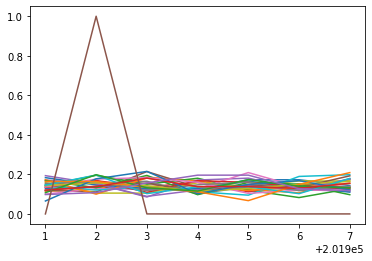

In [125]:
# additional
import matplotlib.pyplot as plt
%matplotlib inline
colnames = byPrice_normal.columns
for colname in colnames:
    plt.plot(byPrice_normal.index, byPrice_normal[colname])

In [107]:
byCustomer = import_data.pivot_table(index = 'purchase_month',
                                     columns = '顧客名',
                                     aggfunc = 'size',
                                     fill_value = 0)
byCustomer

顧客名,さだ千佳子,中仁晶,中田美智子,丸山光臣,久保田倫子,亀井一徳,五十嵐春樹,井上桃子,井口寛治,井川真悠子,...,香椎優一,高原充則,高梨結衣,高沢美咲,高田さんま,鳥居広司,鶴岡薫,麻生莉緒,黄川田博之,黒谷長利
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,3,1,4,2,2,0,5,3,3,1,...,0,1,1,1,5,2,0,2,2,5
201902,9,1,2,2,1,4,2,1,0,4,...,4,0,3,2,0,1,2,4,0,1
201903,1,2,1,6,1,4,3,3,2,2,...,3,1,6,2,4,2,4,2,2,1
201904,0,3,1,2,0,2,2,0,3,2,...,2,4,2,3,4,3,2,1,2,0
201905,3,2,5,2,4,1,2,1,3,3,...,1,1,1,0,2,2,3,4,4,1
201906,1,3,0,4,1,1,1,2,2,3,...,7,3,0,2,1,0,2,1,2,4
201907,3,0,3,2,5,3,5,2,5,5,...,2,4,4,2,0,2,4,3,4,1


In [108]:
byRegion = import_data.pivot_table(index = 'purchase_month',
                                   columns = '地域',
                                   aggfunc = 'size',
                                   fill_value = 0)
byRegion

地域,A市,B市,C市,D市,E市,F市,G市,H市
purchase_month,,,,,,,,
201901,59,55,72,34,49,57,49,42
201902,71,46,65,48,61,52,43,63
201903,64,52,57,43,52,59,51,59
201904,64,48,54,45,48,58,40,52
201905,57,52,68,48,59,65,35,43
201906,53,47,61,30,51,51,58,58
201907,76,53,61,42,54,64,47,54


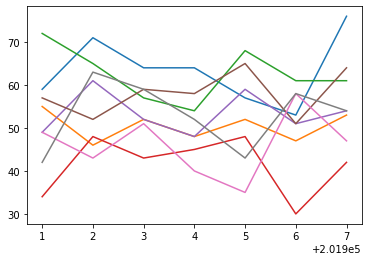

In [129]:
colnames = byRegion.columns
for colname in colnames:
    plt.plot(byRegion.index, byRegion[colname])

In [134]:
byItem_region = pd.crosstab(index = import_data.item_name,
                            columns = import_data.地域,
                            normalize = 'index')
byItem_region

地域,A市,B市,C市,D市,E市,F市,G市,H市
item_name,,,,,,,,
商品A,0.086331,0.086331,0.194245,0.129496,0.172662,0.158273,0.093525,0.079137
商品B,0.150442,0.088496,0.168142,0.079646,0.132743,0.141593,0.070796,0.168142
商品C,0.135338,0.172932,0.150376,0.075188,0.090226,0.127820,0.090226,0.157895
商品D,0.184000,0.128000,0.104000,0.112000,0.088000,0.168000,0.096000,0.120000
商品E,0.152381,0.114286,0.152381,0.095238,0.152381,0.095238,0.114286,0.123810
商品F,0.198413,0.087302,0.198413,0.111111,0.095238,0.134921,0.103175,0.071429
商品G,0.109091,0.190909,0.090909,0.118182,0.081818,0.154545,0.127273,0.127273
商品H,0.137615,0.119266,0.183486,0.091743,0.183486,0.110092,0.091743,0.082569
商品I,0.140351,0.078947,0.157895,0.087719,0.149123,0.157895,0.140351,0.087719


In [111]:
away_data = pd.merge(uriage_data, kokyaku_data, left_on='customer_name', right_on='顧客名', how='right')
away_data[away_data['purchase_date'].isnull()][['顧客名', 'メールアドレス', '登録日']]

,顧客名,メールアドレス,登録日
2999,福井美希,fukui_miki1@example.com,2019-04-23
